In [26]:
from quickImpt import *
from pyPoP2 import *
import pandas as pd

In [27]:
ice = xr.open_dataset('isop_rgd.nc', decode_cf=False)
ice['time'] = pd.date_range('1678', periods=len(ice.time), freq='M') # fake time
ice

<xarray.Dataset>
Dimensions:       (lat: 180, lon: 360, time: 24)
Coordinates:
  * time          (time) datetime64[ns] 1678-01-31 1678-02-28 1678-03-31 ...
  * lat           (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * lon           (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
Data variables:
    isoiceint001  (time, lat, lon) float32 1e+30 1e+30 1e+30 1e+30 1e+30 ...
    isoiceint002  (time, lat, lon) float32 1e+30 1e+30 1e+30 1e+30 1e+30 ...
    isoiceint003  (time, lat, lon) float32 1e+30 1e+30 1e+30 1e+30 1e+30 ...
    isoicessl001  (time, lat, lon) float32 1e+30 1e+30 1e+30 1e+30 1e+30 ...
    isoicessl002  (time, lat, lon) float32 1e+30 1e+30 1e+30 1e+30 1e+30 ...
    isoicessl003  (time, lat, lon) float32 1e+30 1e+30 1e+30 1e+30 1e+30 ...

In [28]:

hdo = ice.isoiceint001 + ice.isoicessl001
h16o = ice.isoiceint002 + ice.isoicessl002
h18o = ice.isoiceint003 + ice.isoicessl003

d18o = (h18o / h16o - 1) * 1000
dD = (hdo / h16o - 1) * 1000

#seasonal average
d18o_snave = d18o.groupby('time.season').mean(dim='time')
dD_snave =  dD.groupby('time.season').mean(dim='time')



In [37]:
# plot
%matplotlib inline

def plotdelta(dsarray, levels, region='north'):
    import matplotlib.path as mpath
    fig = plt.figure(figsize=(12,12))

    i = 1
    for sn in dsarray.season:
        if region == 'north':
            ax = fig.add_subplot(2,2,i, projection=ccrs.NorthPolarStereo())
            i += 1

            box=[-180, 180, 30, 90]
            xstep,ystep=30,15
            # Limit the map to -60 degrees latitude and below.
            ax.set_extent(box, crs=ccrs.PlateCarree())
            scale='50m'
            ax.coastlines(scale,linewidth=0.9) 

            #ticks
            line=ax.gridlines(draw_labels=False)

            line.ylocator=mticker.FixedLocator(np.arange(30,100,20))
            line.xlocator=mticker.FixedLocator(np.arange(-180,210,30))

            theta = np.linspace(0, 2*np.pi, 100)
            center, radius = [0.5, 0.5], 0.5
            verts = np.vstack([np.sin(theta), np.cos(theta)]).T
            circle = mpath.Path(verts * radius + center)
            ax.set_boundary(circle, transform=ax.transAxes)
            
        else:
            ax = fig.add_subplot(2,2,i, projection=ccrs.SouthPolarStereo())
            i += 1

            box=[-180, 180, -90, -40]
            xstep,ystep=30,15
            # Limit the map to -60 degrees latitude and below.
            ax.set_extent(box, crs=ccrs.PlateCarree())
            scale='50m'
            ax.coastlines(scale,linewidth=0.9) 

            #ticks
            line=ax.gridlines(draw_labels=False)

            line.ylocator=mticker.FixedLocator(np.arange(-90,20,20))
            line.xlocator=mticker.FixedLocator(np.arange(-180,210,30))

            theta = np.linspace(0, 2*np.pi, 100)
            center, radius = [0.5, 0.5], 0.5
            verts = np.vstack([np.sin(theta), np.cos(theta)]).T
            circle = mpath.Path(verts * radius + center)
            ax.set_boundary(circle, transform=ax.transAxes)

        dsarray.sel(season=sn).plot.contourf(ax=ax, levels=levels, transform=ccrs.PlateCarree())

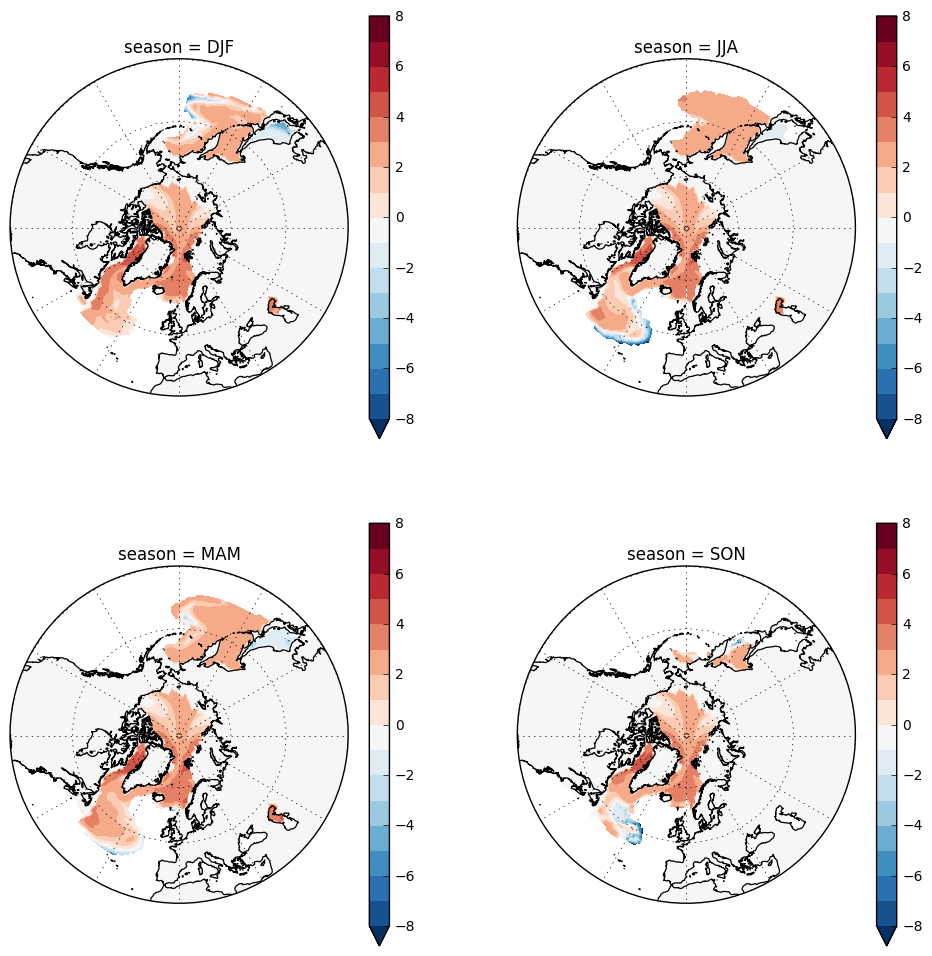

In [34]:
# d18o distribution in north polar 
levels = np.arange(-8,9,1)
plotdelta(d18o_snave, levels)    

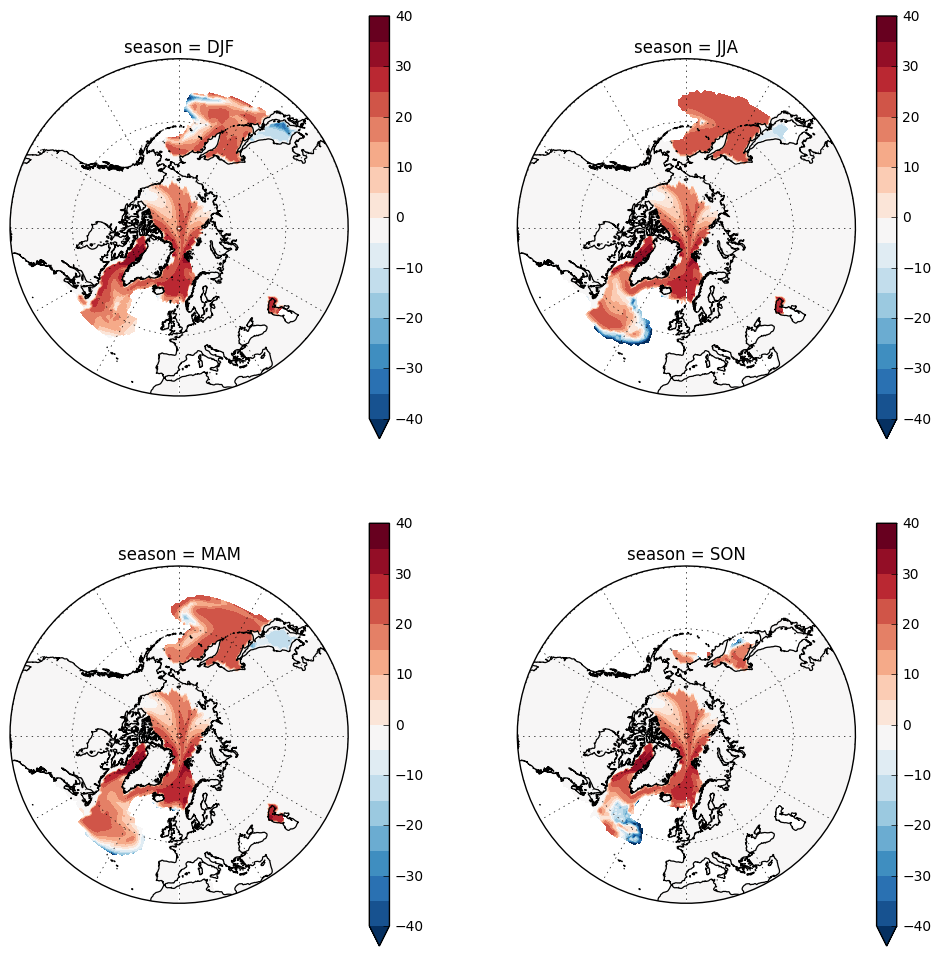

In [36]:
# dD in north polar, seasonal distribution   
levels = np.arange(-40,45,5)
plotdelta(dD_snave, levels)

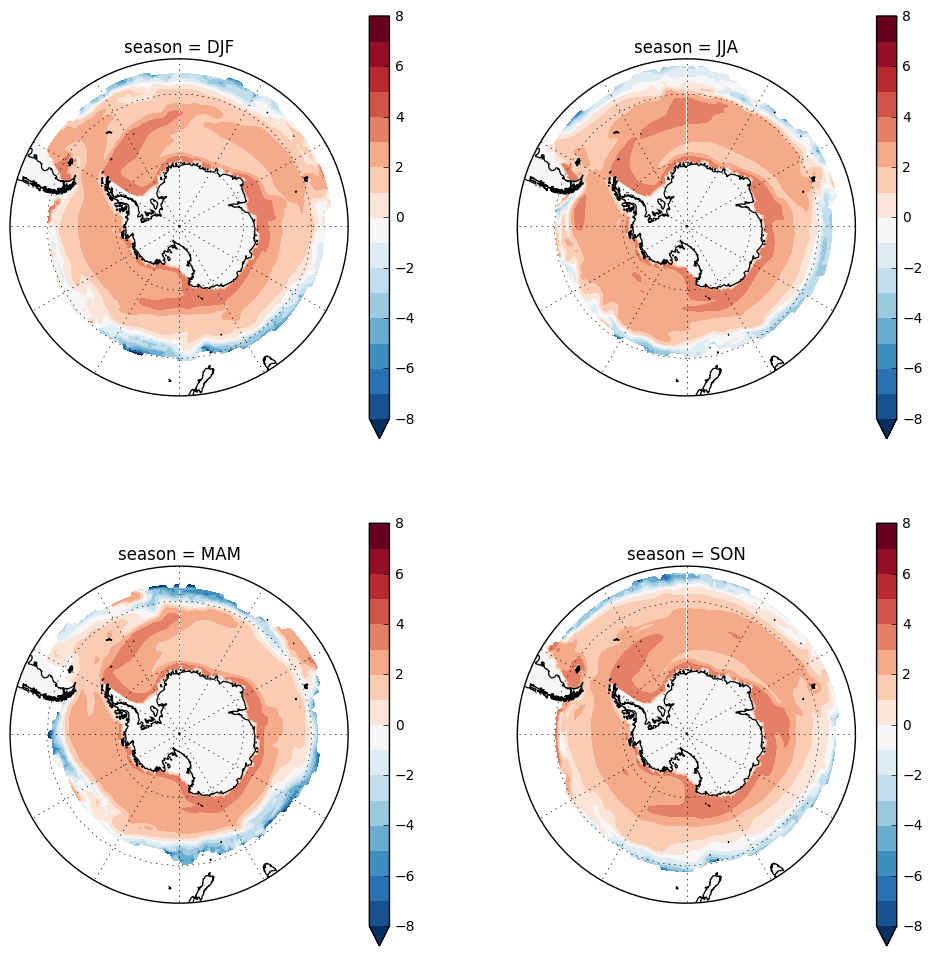

In [38]:
# d18o distribution in south polar 
levels = np.arange(-8,9,1)
plotdelta(d18o_snave, levels, region='south')   

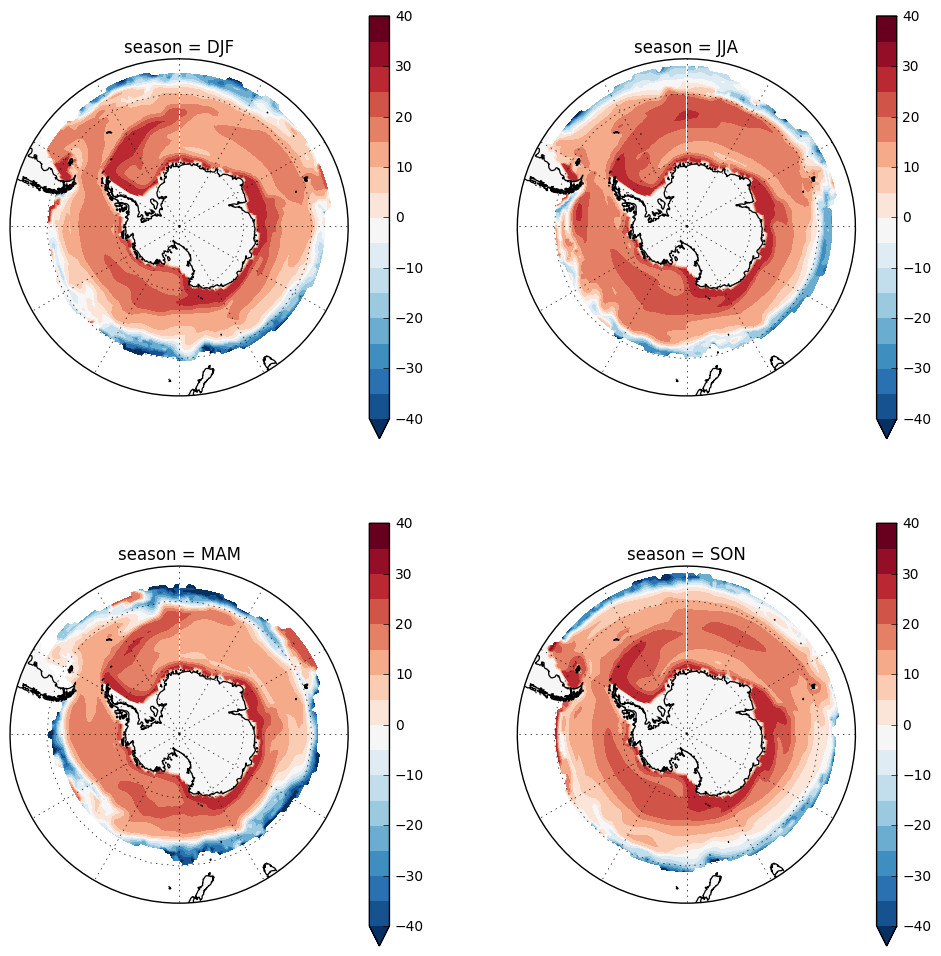

In [40]:
# dD distribution in south polar 
levels = np.arange(-40,45,5)
plotdelta(dD_snave, levels, region='south')   

In [49]:
# annual mean
d18o_an = d18o.groupby('time.year').mean(dim='time').mean(dim='year')
dD_an = dD.groupby('time.year').mean(dim='time').mean(dim='year')

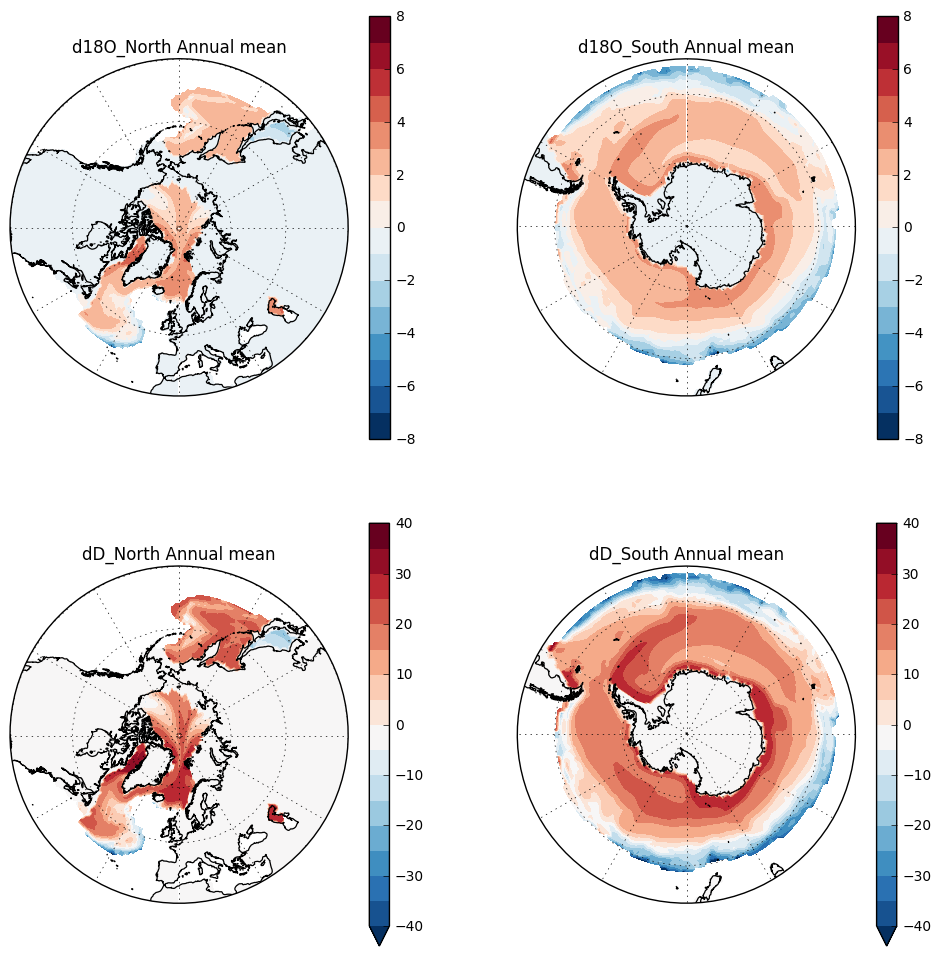

In [59]:
# plot
fig = plt.figure(figsize=(12,12))

def pltannual(dsarray, i, levels, region='north'):
    
    if region == 'north':
        ax = fig.add_subplot(2,2,i, projection=ccrs.NorthPolarStereo())

        box=[-180, 180, 30, 90]
        xstep,ystep=30,15
        # Limit the map to -60 degrees latitude and below.
        ax.set_extent(box, crs=ccrs.PlateCarree())
        scale='50m'
        ax.coastlines(scale,linewidth=0.9) 

        #ticks
        line=ax.gridlines(draw_labels=False)

        line.ylocator=mticker.FixedLocator(np.arange(30,100,20))
        line.xlocator=mticker.FixedLocator(np.arange(-180,210,30))

        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        ax.set_boundary(circle, transform=ax.transAxes)

    else:
        ax = fig.add_subplot(2,2,i, projection=ccrs.SouthPolarStereo())

        box=[-180, 180, -90, -40]
        xstep,ystep=30,15
        # Limit the map to -60 degrees latitude and below.
        ax.set_extent(box, crs=ccrs.PlateCarree())
        scale='50m'
        ax.coastlines(scale,linewidth=0.9) 

        #ticks
        line=ax.gridlines(draw_labels=False)

        line.ylocator=mticker.FixedLocator(np.arange(-90,20,20))
        line.xlocator=mticker.FixedLocator(np.arange(-180,210,30))

        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        ax.set_boundary(circle, transform=ax.transAxes)
      
    dsarray.plot.contourf(ax=ax, levels=levels, transform=ccrs.PlateCarree())
    
levels = np.arange(-8,9,1)
pltannual(d18o_an, i=1, levels=levels)
plt.title('d18O_North Annual mean')
pltannual(d18o_an, i=2, levels=levels, region='south')
plt.title('d18O_South Annual mean')

levels = np.arange(-40,45,5)
pltannual(dD_an, i=3, levels=levels)
plt.title('dD_North Annual mean')
pltannual(dD_an, i=4, levels=levels, region='south')
plt.title('dD_South Annual mean')
